## Importing Necessary Libraries

In [1]:
import cv2
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import imutils
import webcolors
import time
import os

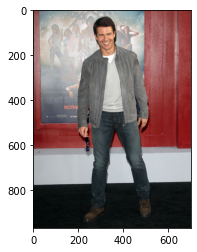

In [2]:
img = cv2.imread("examples/img_2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img.shape

(967, 700, 3)

In [4]:
org_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Used KMeans Clustering to find the cluster of colors present in image

In [5]:
cluster = KMeans(n_clusters=5)     # n_clusters =  for 5 most dominant colors
cluster.fit(img.reshape(-1,3))

KMeans(n_clusters=5)

#### Cluster center represents the rgb values of dominant colors

In [6]:
cluster.cluster_centers_

array([[152.41991961, 127.72826262, 126.37453327],
       [ 18.79402127,  22.45554919,  23.179669  ],
       [195.01480981, 195.6593744 , 194.88835969],
       [142.27203873,  49.92830483,  48.97294448],
       [ 85.29998618,  88.52811036,  90.7120997 ]])

#### Function for displaying dominant colors

In [7]:
def show_dominant_colors(arr):
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    steps = 300 / arr.shape[0]
    for idx, ele in enumerate(arr):
        color_deck[:, int(idx*steps):(int((idx+1)*steps)), :] = ele
    return color_deck

## No. of Colors Occuring in the Images

In [8]:
arr = cluster.cluster_centers_

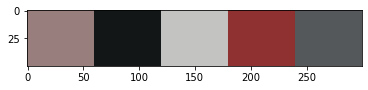

In [9]:
plt.imshow(show_dominant_colors(arr))

In [10]:
len(cluster.labels_)

676900

## Frequency / Percentage of color occuring in image

#### Function for Displaying proportion of colors in an image

In [11]:
def show_dominant_colors_frequency(arr, len_of_pixels, count):
    
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    no_of_pixels = len_of_pixels
    percentage = {}
    for i in count:
        percentage[i] = np.round((count[i] / no_of_pixels), 2)
    
    percentage = dict(sorted(percentage.items()))
    # print(percentage)
    
    steps = 0
    for idx, ele in enumerate(arr):
        color_deck[:, steps:int(steps+ percentage[idx]*300+1), :] = ele
        steps += int(percentage[idx]*300+1)
    
    return color_deck

#### Displays Colors and Imges

In [12]:
def rgb_to_hex(rgb):
    return '#'+('%02x%02x%02x' % rgb)

In [13]:
def get_Colors(img):
    
    
    t = time.time()
    # img = cv2.imread(img_path)
    fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    cluster = KMeans(n_clusters=5)
    cluster.fit(fix_img.reshape(-1,3))
    
    count = Counter(cluster.labels_)
    arr = cluster.cluster_centers_
    
    final_color_list = []
    hex_list = []
    for lst in arr:
        round_value = []
        for value in lst:
            round_value.append(round(value))
        final_color_list.append(get_colour_name(round_value))
        hex_list.append(rgb_to_hex(tuple(round_value)))
    
    print("Color Names: ", final_color_list)
    print("Hexadecimal Values: ", hex_list)
    print("Resolution of Image: ", str(fix_img.shape[1])+" X "+str(fix_img.shape[0]))
    
    
    
    len_of_pixels = len(cluster.labels_)
    f = plt.figure(figsize=(10,7))
    f.add_subplot(1,2, 1)
    plt.imshow(fix_img)
    f.add_subplot(1,2, 2)
    plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_), count))
    plt.show(block=True)
    print("Time for Prediction : {:.3f}".format(time.time() - t))
    
    print('\n=======================================================================\n')
    #plt.imshow(fix_img)
    #plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_), count))

### Function for displaying color names

In [15]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.HTML4_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name

# requested_colour = (119, 172, 152)
# actual_name, closest_name = get_colour_name(requested_colour)

# print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

### Function to load Images from Dataset

In [16]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

## Results on PETA dataset

In [17]:
images_peta = load_images_from_folder('PETA_dataset/MIT/archive/')

Color Names:  ['silver', 'gray', 'gray', 'black', 'gray']
Hexadecimal Values:  ['#a9a8b1', '#584d51', '#908681', '#291e35', '#766b68']
Resolution of Image:  64 X 128


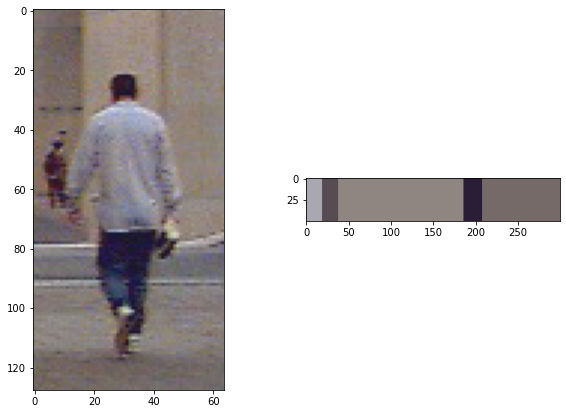

Time for Prediction : 0.801


Color Names:  ['silver', 'gray', 'gray', 'black', 'gray']
Hexadecimal Values:  ['#a9a8b1', '#756b68', '#908681', '#281e35', '#554b50']
Resolution of Image:  64 X 128


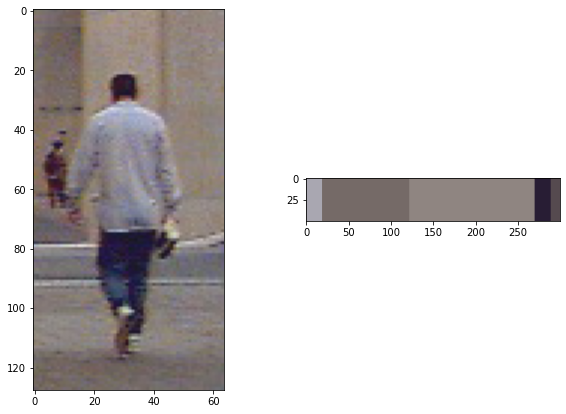

Time for Prediction : 0.704


Color Names:  ['gray', 'black', 'gray', 'silver', 'gray']
Hexadecimal Values:  ['#918681', '#271931', '#57454d', '#cdcfcd', '#756c6e']
Resolution of Image:  64 X 128


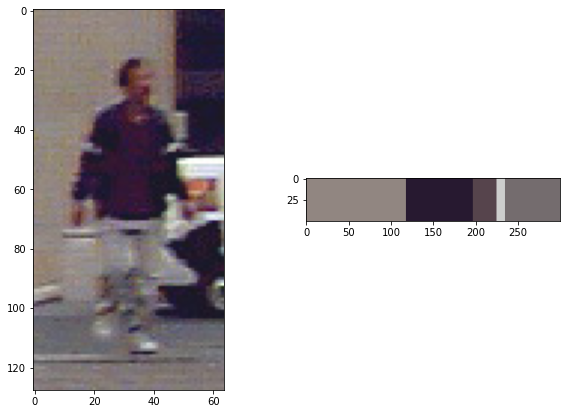

Time for Prediction : 0.713


Color Names:  ['purple', 'silver', 'black', 'gray', 'silver']
Hexadecimal Values:  ['#643c55', '#ae9d99', '#3c1b38', '#8c6a6e', '#c1b2b1']
Resolution of Image:  64 X 128


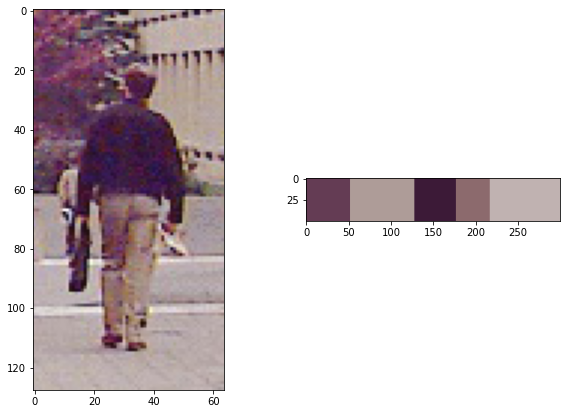

Time for Prediction : 0.928


Color Names:  ['silver', 'gray', 'silver', 'gray', 'maroon']
Hexadecimal Values:  ['#b2a29f', '#60455e', '#c4b4b2', '#907a81', '#441e39']
Resolution of Image:  64 X 128


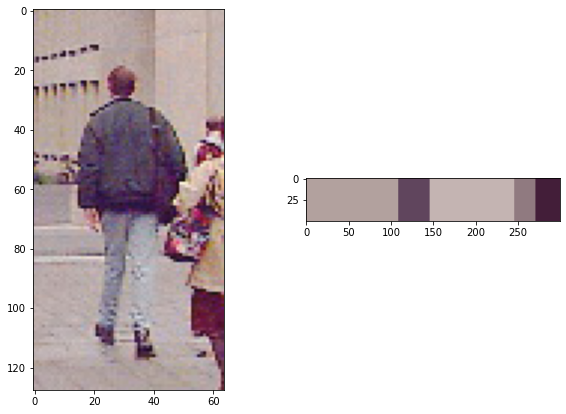

Time for Prediction : 0.876


Color Names:  ['gray', 'silver', 'gray', 'black', 'gray']
Hexadecimal Values:  ['#5e4254', '#bcaeaa', '#7b636b', '#341839', '#a79795']
Resolution of Image:  64 X 128


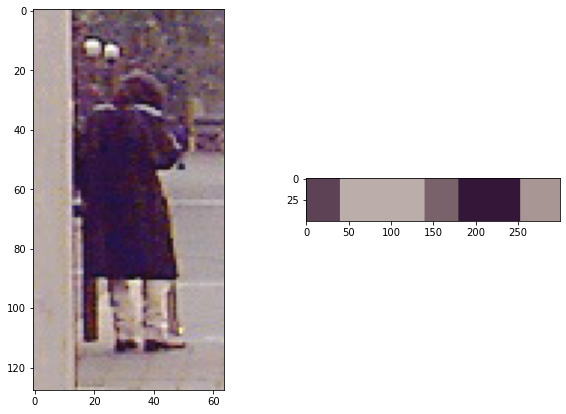

Time for Prediction : 0.957


Color Names:  ['gray', 'gray', 'gray', 'gray', 'silver']
Hexadecimal Values:  ['#989391', '#504650', '#6f5e5d', '#887e7b', '#bab3af']
Resolution of Image:  64 X 128


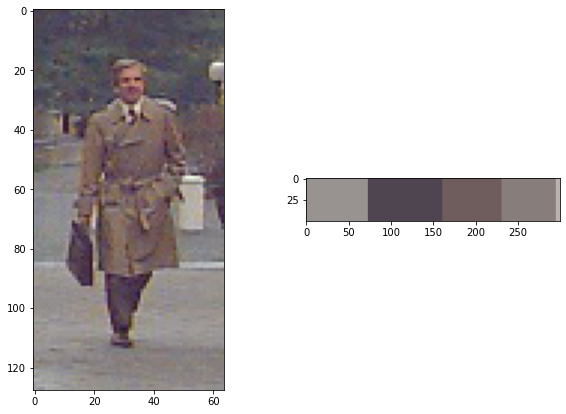

Time for Prediction : 0.771


Color Names:  ['gray', 'purple', 'gray', 'gray', 'silver']
Hexadecimal Values:  ['#a79e9a', '#543d59', '#938a88', '#73676c', '#c4bcb4']
Resolution of Image:  64 X 128


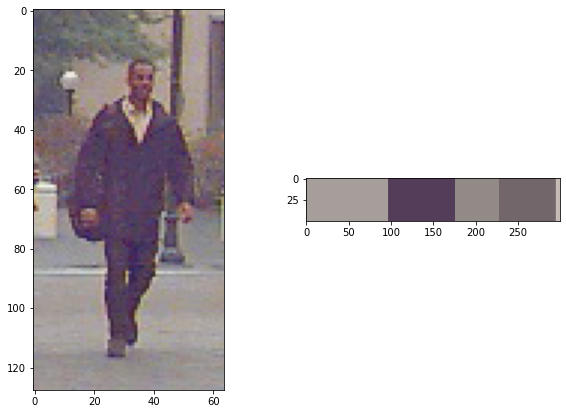

Time for Prediction : 0.788


Color Names:  ['gray', 'purple', 'silver', 'gray', 'gray']
Hexadecimal Values:  ['#8f837f', '#442b4f', '#c7c3be', '#61596d', '#a3978e']
Resolution of Image:  64 X 128


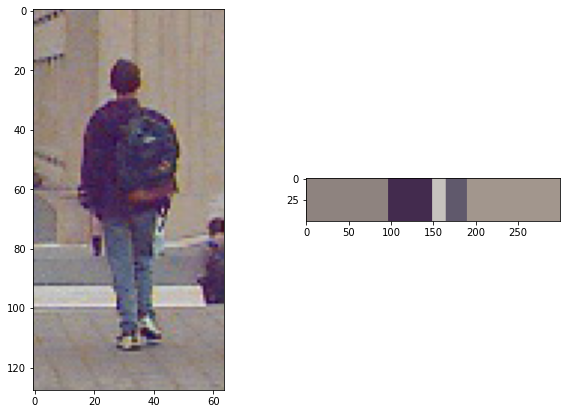

Time for Prediction : 0.724


Color Names:  ['silver', 'purple', 'gray', 'gray', 'black']
Hexadecimal Values:  ['#bcadab', '#533752', '#705767', '#a28a89', '#3b1d3b']
Resolution of Image:  64 X 128


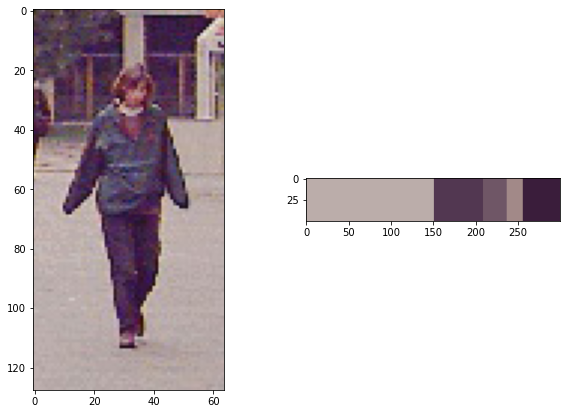

Time for Prediction : 0.985




In [18]:
for img in images_peta[:10]:
    get_Colors(img)

## Result on Caltech Persons Dataset

In [19]:
images_person = load_images_from_folder('persons/')

Color Names:  ['gray', 'black', 'maroon', 'silver', 'maroon']
Hexadecimal Values:  ['#b96649', '#0e050a', '#921a03', '#e3cec2', '#b33908']
Resolution of Image:  480 X 640


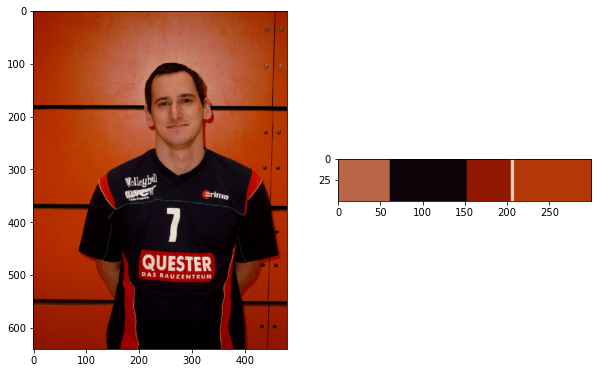

Time for Prediction : 4.983


Color Names:  ['maroon', 'black', 'gray', 'maroon', 'maroon']
Hexadecimal Values:  ['#5f0501', '#070101', '#b08261', '#921c02', '#7e0500']
Resolution of Image:  480 X 640


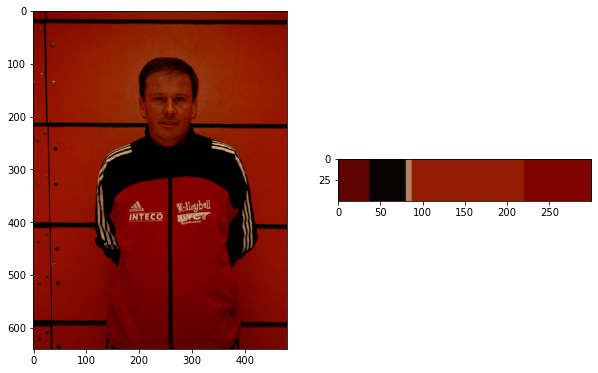

Time for Prediction : 4.374


Color Names:  ['olive', 'black', 'gray', 'silver', 'maroon']
Hexadecimal Values:  ['#bb440d', '#14090f', '#c37155', '#e7c1b4', '#951d04']
Resolution of Image:  480 X 640


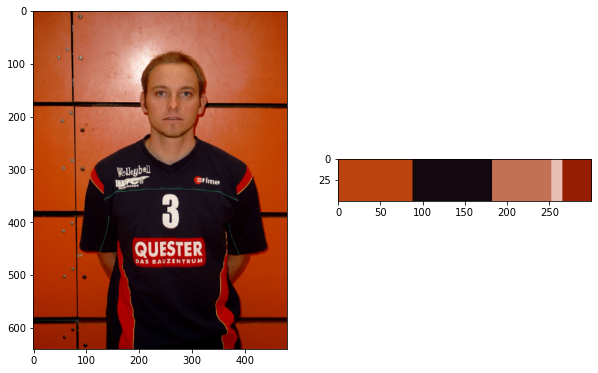

Time for Prediction : 7.345


Color Names:  ['black', 'gray', 'silver', 'gray', 'maroon']
Hexadecimal Values:  ['#161513', '#989894', '#bec1c0', '#7d726a', '#52231b']
Resolution of Image:  480 X 640


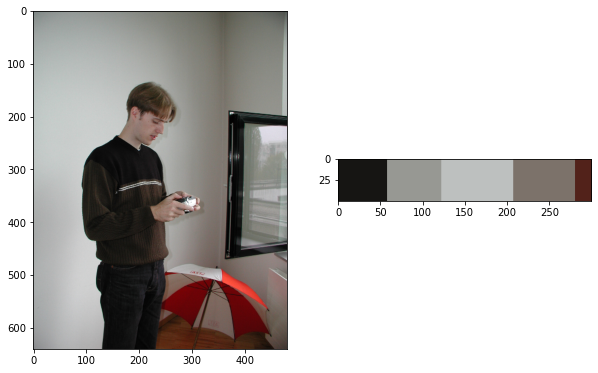

Time for Prediction : 5.176


Color Names:  ['gray', 'silver', 'white', 'gray', 'green']
Hexadecimal Values:  ['#64714d', '#b5b2ad', '#f9f9f8', '#848876', '#3a432b']
Resolution of Image:  480 X 640


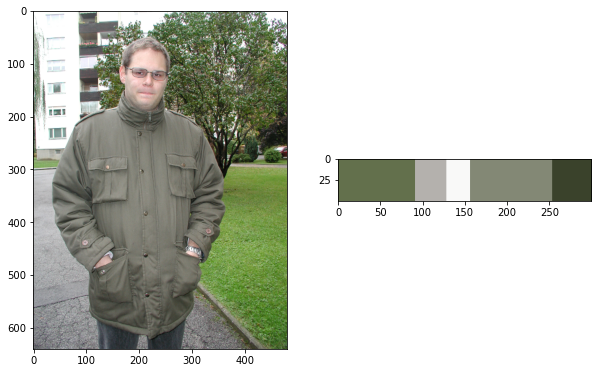

Time for Prediction : 7.818


Color Names:  ['silver', 'gray', 'gray', 'black', 'gray']
Hexadecimal Values:  ['#b6bdbb', '#544d41', '#989e99', '#2d261e', '#78756b']
Resolution of Image:  480 X 640


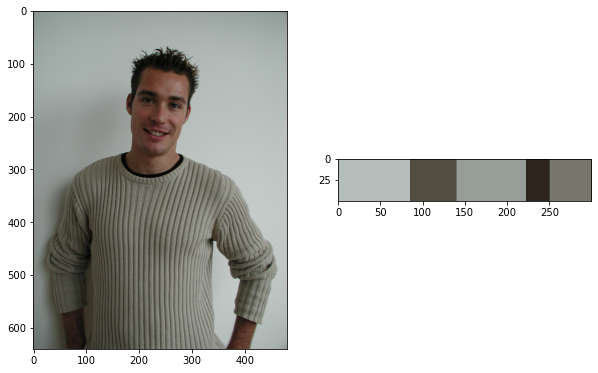

Time for Prediction : 6.581


Color Names:  ['maroon', 'gray', 'black', 'gray', 'gray']
Hexadecimal Values:  ['#473737', '#776c70', '#292022', '#5c4f52', '#8d8388']
Resolution of Image:  480 X 640


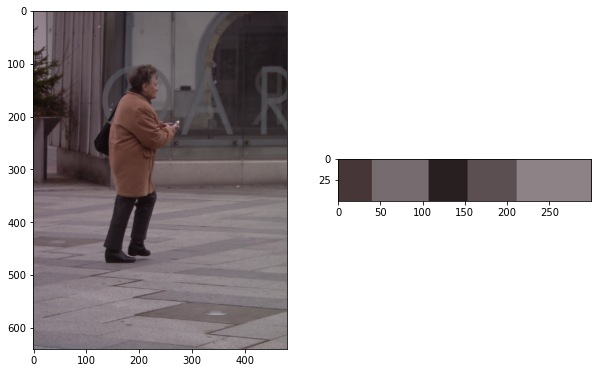

Time for Prediction : 7.478


Color Names:  ['gray', 'gray', 'black', 'gray', 'black']
Hexadecimal Values:  ['#5a4c59', '#908698', '#231a21', '#716571', '#3e313c']
Resolution of Image:  480 X 640


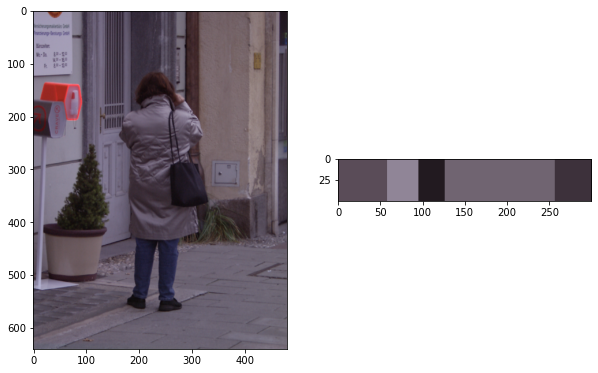

Time for Prediction : 7.444


Color Names:  ['gray', 'purple', 'white', 'gray', 'black']
Hexadecimal Values:  ['#9e91a1', '#513e48', '#ebe1ea', '#746573', '#20161c']
Resolution of Image:  480 X 640


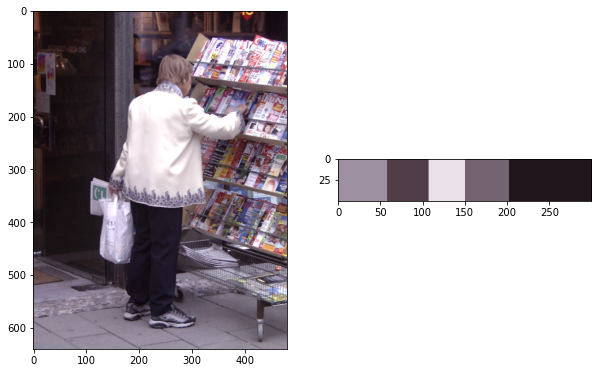

Time for Prediction : 6.245


Color Names:  ['gray', 'silver', 'gray', 'black', 'gray']
Hexadecimal Values:  ['#55494e', '#b5aaa8', '#918288', '#251a1d', '#766970']
Resolution of Image:  480 X 640


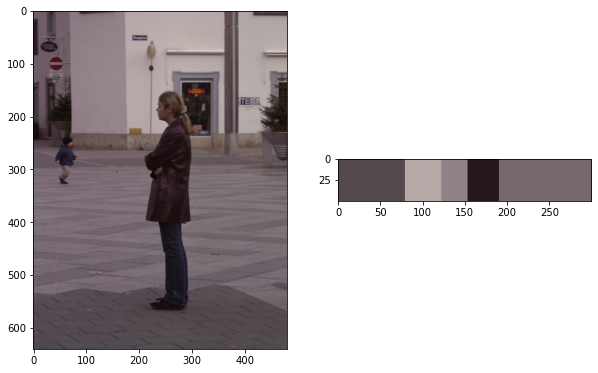

Time for Prediction : 5.318




In [20]:
for img in images_person[:10]:
    get_Colors(img)

## Applying Model on High Resolution Images

In [21]:
images_kaggle = load_images_from_folder('Kaggle_images/')

Color Names:  ['maroon', 'white', 'gray', 'red', 'black']
Hexadecimal Values:  ['#ba151f', '#e8e8e8', '#bf8a74', '#e32438', '#342422']
Resolution of Image:  606 X 875


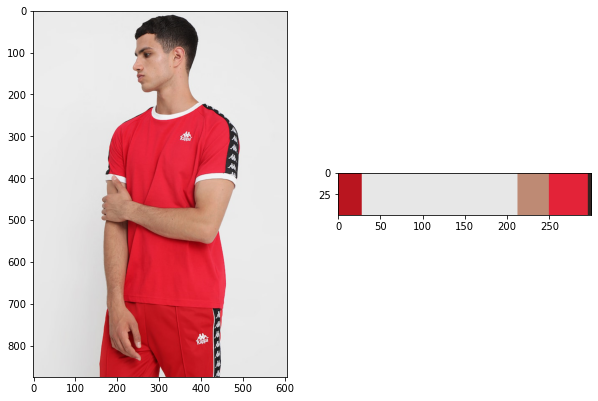

Time for Prediction : 6.885


Color Names:  ['white', 'teal', 'black', 'silver', 'gray']
Hexadecimal Values:  ['#e5e6e6', '#176983', '#171b1d', '#d0adab', '#7e736a']
Resolution of Image:  606 X 875


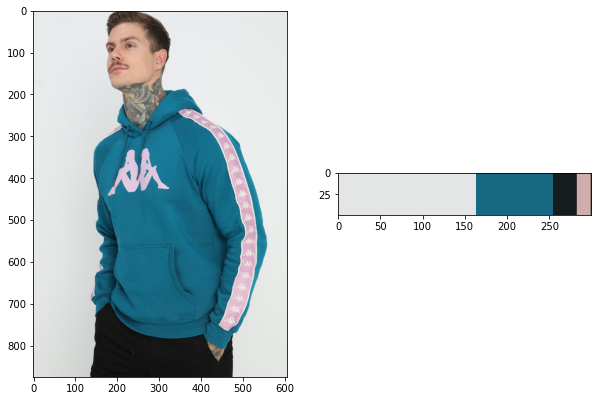

Time for Prediction : 9.765


Color Names:  ['white', 'gray', 'silver', 'silver', 'gray']
Hexadecimal Values:  ['#ebebe8', '#798392', '#cca28d', '#d8d3cd', '#725c55']
Resolution of Image:  606 X 875


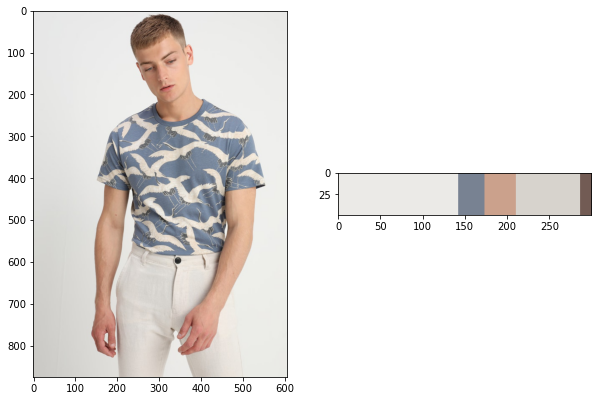

Time for Prediction : 8.463


Color Names:  ['white', 'black', 'teal', 'silver', 'gray']
Hexadecimal Values:  ['#eaebeb', '#1c1b1e', '#37aa9f', '#caa18f', '#815c51']
Resolution of Image:  606 X 875


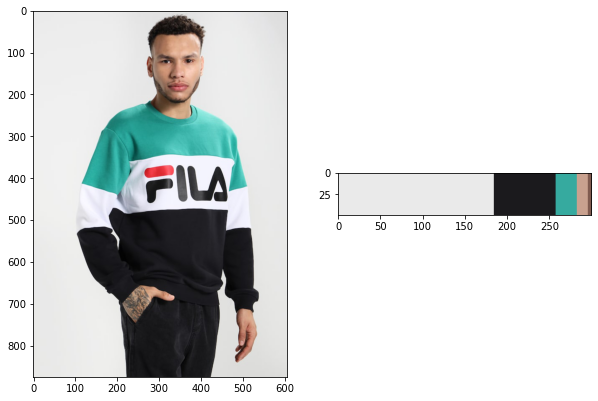

Time for Prediction : 8.297


Color Names:  ['white', 'gray', 'black', 'red', 'silver']
Hexadecimal Values:  ['#f0f0f0', '#7e5445', '#1a191a', '#ea2c39', '#c6bdbd']
Resolution of Image:  606 X 875


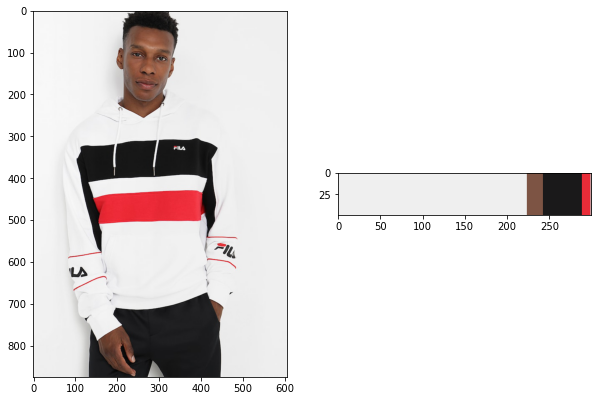

Time for Prediction : 8.666


Color Names:  ['silver', 'white', 'teal', 'black', 'gray']
Hexadecimal Values:  ['#cc9d80', '#eeeeee', '#2a90de', '#282628', '#856a5a']
Resolution of Image:  606 X 875


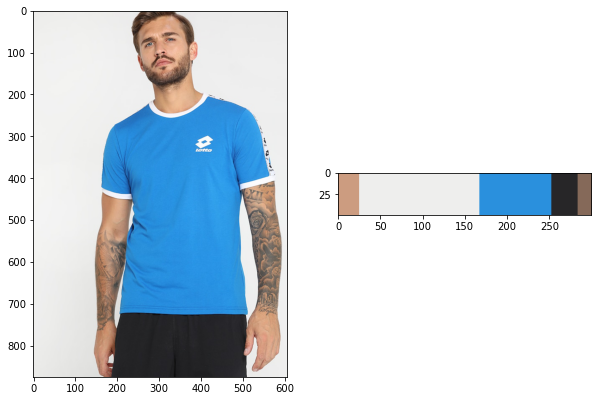

Time for Prediction : 6.040




In [22]:
for img in images_kaggle[:]:
    get_Colors(img)